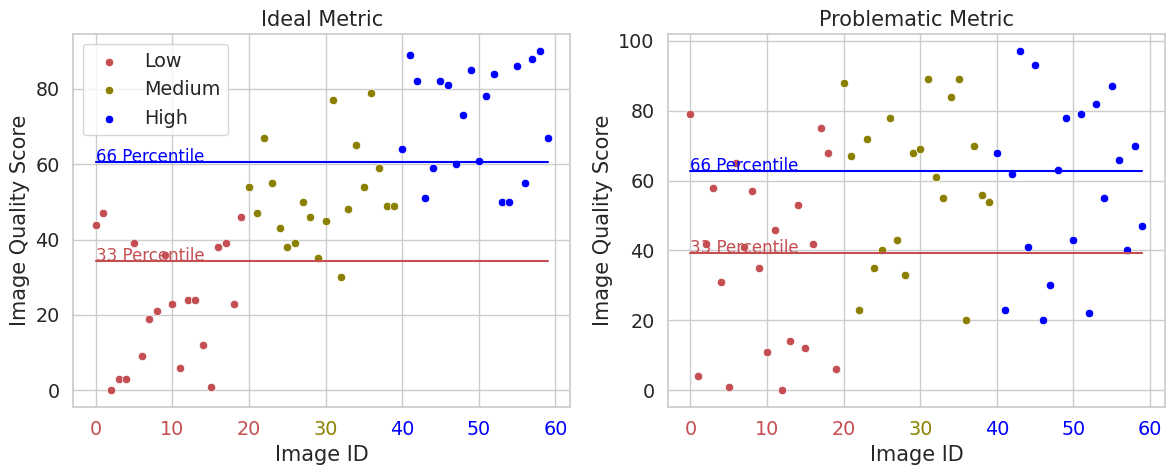

In [15]:
# Illustrate the idea of three types of scores, low, mid, and high.
# Low scores will be randomly concentrate with values ranging from 0 to 60, but mainly on 0-30
# Mid scores will be randomly concentrate with values ranging from 30 to 80, but mainly on 30-60
# High scores will be randomly concentrate with values ranging from 60 to 100, but mainly on 60-100

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_data(ax, data="good"):

    if data == "good":
        low = np.random.randint(0, 50, 20)
        mid = np.random.randint(30, 80, 20)
        high = np.random.randint(50, 100, 20)
    else:
        low = np.random.randint(0, 80, 20)
        mid = np.random.randint(20, 90, 20)
        high = np.random.randint(20, 100, 20)

    x = np.arange(0, 100)
    y = np.stack([low, mid, high], axis=0).flatten()    

    # sns.kdeplot(low, shade=True, color="r", label="Low")
    label="Low"
    if data!="good":
        label=""
    sns.scatterplot(x=x[:20], y=y[:20], color="r", label=label, ax=ax)
    label="Medium"
    if data!="good":
        label=""
    sns.scatterplot(x=x[20:40], y=y[20:40], color="#8B8000", label=label, ax=ax)
    label="High"
    if data!="good":
        label=""
    sns.scatterplot(x=x[40:60], y=y[40:], color="blue", label=label, ax=ax)

    labels = np.stack([np.zeros(20), np.ones(20)], axis=0).flatten()
    y =  np.stack([low, high], axis=0).flatten()
    fpr, tpr, thresholds = roc_curve(labels, y)
    optimal_idx = np.argmax(tpr - fpr)
    if data == "good":
        optimal_threshold = np.ones_like(x) * 50
    else:
        optimal_threshold = np.ones_like(x) * thresholds[optimal_idx]

    # 33 quantile
    y_33 = np.percentile(y, 33)
    y_66 = np.percentile(y, 66)
    sns.lineplot(x=x[:60], y=np.ones_like(x[:60])*y_33, color="r", ax=ax)
    sns.lineplot(x=x[:60], y=np.ones_like(x[:60])*y_66, color="blue", ax=ax)
    ax.text(0, y_33 , f"33 Percentile", fontsize=12, color="r")
    ax.text(0, y_66 , f"66 Percentile", fontsize=12, color="blue")

    color_ranges = [(0, 21, 'r'), (20, 40, '#8B8000'), (40, 61, 'blue')]

    # Iterate through x-axis tick labels and set color based on ranges
    for tick in ax.get_xticklabels():
        x_val = tick.get_text()
        for start, end, color in color_ranges:
            if '−' in x_val:
                continue
            if start <= int(x_val) < end:
                tick.set_color(color)
                break

    ax.set_xlabel("Image ID")
    ax.set_ylabel("Image Quality Score")
    
    ax.set_title("Problematic Metric")
    if data =="good":
        ax.set_title("Ideal Metric")
        

fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
sns.set(style="whitegrid", font_scale=1.25)

# set a seed to numpy
np.random.seed(0)
plot_data(ax[0])
plot_data(ax[1], "bad")
# colorize the x-axis labels with 0-20 as low, 20-40 as mid, and 40-60 as high
# in the top of the numeric labels


plt.tight_layout()
plt.savefig("../results/percentile/percentil-idea.pdf")
plt.show()
